In [36]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

path = './dataset/stage_1_train.csv'
df = pd.read_csv(path)
df.head()

,ID,Label,PatientID,Sub_type
0,ID_63eb1e259_epidural,0,63eb1e259,epidural
1,ID_63eb1e259_intraparenchymal,0,63eb1e259,intraparenchymal
2,ID_63eb1e259_intraventricular,0,63eb1e259,intraventricular
3,ID_63eb1e259_subarachnoid,0,63eb1e259,subarachnoid
4,ID_63eb1e259_subdural,0,63eb1e259,subdural


In [9]:
print('사람 수: ',df.shape[0]//6, ' 슬라이스 수: ', df.shape[0])

사람 수:  674262  슬라이스 수:  4045572


In [14]:
print('Error slice 수: ', df.Label.isnull().sum() )

Error slice 수:  0


# 0과 1 레이블의 counting

In [21]:
label_cnt = df.Label.value_counts()
cnt_0, cnt_1 = label_cnt
print(f'0 레이블 개수: {cnt_0}\t1 레이블 개수: {cnt_1}')

  레이블 개수:3814760	1 레이블 개수:230812


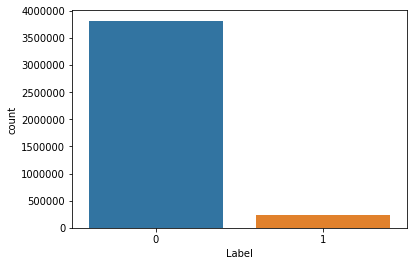

In [16]:
sns.countplot(df.Label)

In [26]:
df['PatientID'] = df['ID'].str.split("_", n=3, expand=True)[1]
df['Sub_type']  = df['ID'].str.split("_", n=3, expand=True)[2]

In [27]:
df.head()

,ID,Label,PatientID,Sub_type
0,ID_63eb1e259_epidural,0,63eb1e259,epidural
1,ID_63eb1e259_intraparenchymal,0,63eb1e259,intraparenchymal
2,ID_63eb1e259_intraventricular,0,63eb1e259,intraventricular
3,ID_63eb1e259_subarachnoid,0,63eb1e259,subarachnoid
4,ID_63eb1e259_subdural,0,63eb1e259,subdural


# 각 뇌출혈 종류별 couting

In [32]:
gbSub = df.groupby('Sub_type').sum()
gbSub

,Label
Sub_type,
any,97103
epidural,2761
intraparenchymal,32564
intraventricular,23766
subarachnoid,32122
subdural,42496


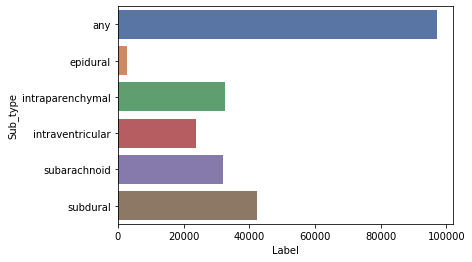

In [34]:
sns.barplot(y=gbSub.index, x=gbSub.Label, palette='deep')

Text(0.5, 1.0, 'Total Images by Subtype')

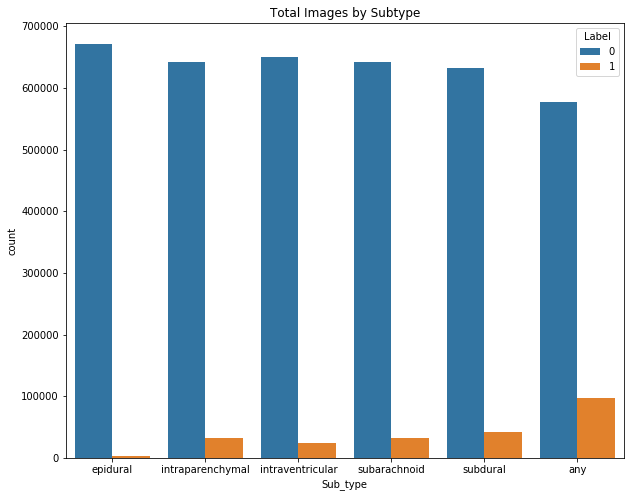

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x='Sub_type', hue='Label', data=df)
plt.title("Total Images by Subtype")

# 환자별 진단 뇌출혈 수 counting

In [64]:
gb = df.groupby('PatientID').sum()
gb_without_null = gb[gb>0].dropna()

,Label
PatientID,
0002081b6,2.0
0002a38ad,3.0
000346ce2,2.0
00042829c,2.0
0004a5701,2.0
...,...
fffb124e6,3.0
fffb16e96,2.0
fffc60817,3.0


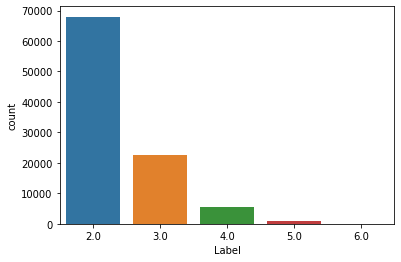

In [65]:
# 2가지 이상의 label에 해당 되는 환자 수 counting
sns.countplot(gb_without_null.Label)

In [59]:
# 3개의 뇌출혈 체크된 특정환자 sample
df[df.PatientID.isin(['fffb124e6'])]

,ID,Label,PatientID,Sub_type
1586922,ID_fffb124e6_epidural,0,fffb124e6,epidural
1586923,ID_fffb124e6_intraparenchymal,0,fffb124e6,intraparenchymal
1586924,ID_fffb124e6_intraventricular,0,fffb124e6,intraventricular
1586925,ID_fffb124e6_subarachnoid,1,fffb124e6,subarachnoid
1586926,ID_fffb124e6_subdural,1,fffb124e6,subdural
1586927,ID_fffb124e6_any,1,fffb124e6,any


# 환자별 뇌출혈 label 확인

In [106]:
gb = df.groupby('PatientID').sum()
gb.shape

(674258, 1)

In [84]:
df.PatientID.value_counts()

921490062    12
489ae4179    12
a64d5deed    12
854fba667    12
73c3e854c     6
             ..
b9cc26600     6
964d12054     6
70de7c31b     6
3ed9dfee1     6
e8a2d942b     6
Name: PatientID, Length: 674258, dtype: int64

In [103]:
# 중복 환자 제거
df_rm_duplicate = df.drop(df[df.PatientID.isin(['921490062', '489ae4179', 'a64d5deed', '854fba667'])].index)

In [105]:
df.shape, df_rm_duplicate.shape

((4045572, 4), (4045524, 4))

In [104]:
df_rm_duplicate.pivot('PatientID', 'Sub_type', 'Label')

Sub_type,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
PatientID,,,,,,
000039fa0,0,0,0,0,0,0
00005679d,0,0,0,0,0,0
00008ce3c,0,0,0,0,0,0
0000950d7,0,0,0,0,0,0
0000aee4b,0,0,0,0,0,0
...,...,...,...,...,...,...
ffff73ede,0,0,0,0,0,0
ffff80705,0,0,0,0,0,0
ffff82e46,0,0,0,0,0,0
